In [1]:
import wine_wrangle as ww
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.preprocessing
import auto_model2a as atm
import auto_model3 as atm3
import testing_models as tm
#ignore all warnings
import warnings 
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler


In [2]:
red_wine= ww.get_csv("winequality-red.csv")

In [3]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
red_wine.shape

(1599, 12)

In [5]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
red_wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [7]:
white_wine= ww.get_csv("winequality-white.csv")

In [8]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [9]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [10]:
#add a row to each df to indicate red or white
red_wine['color'] = 'red'
white_wine['color'] = 'white'

In [11]:
#combine the two df's
wine = pd.concat([red_wine, white_wine])

In [12]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [13]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


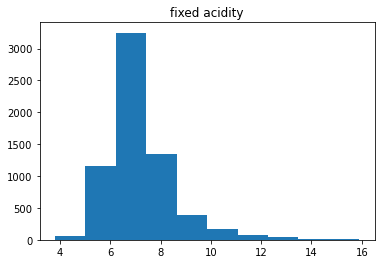

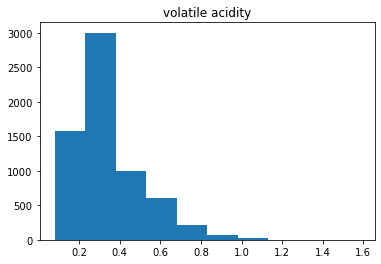

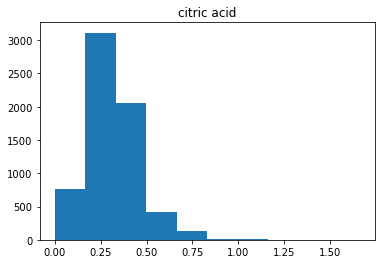

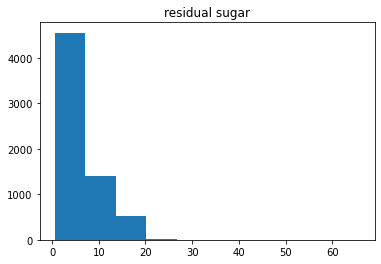

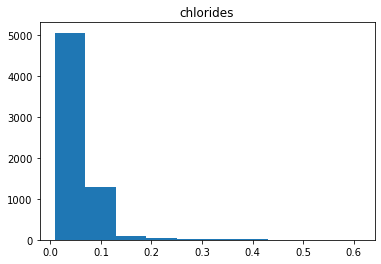

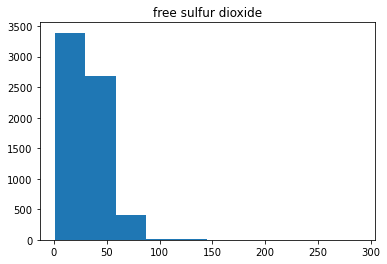

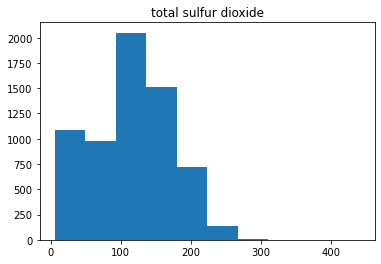

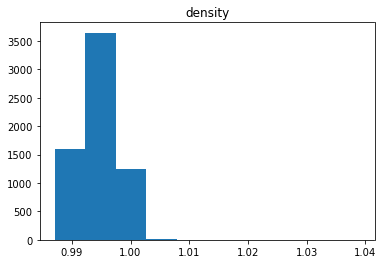

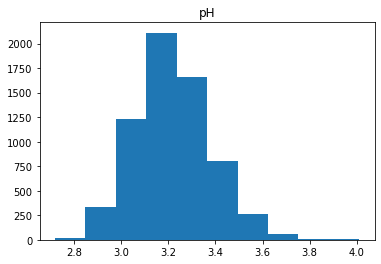

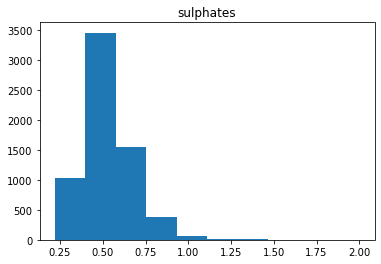

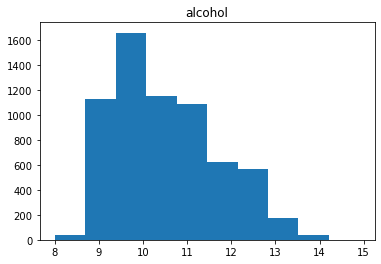

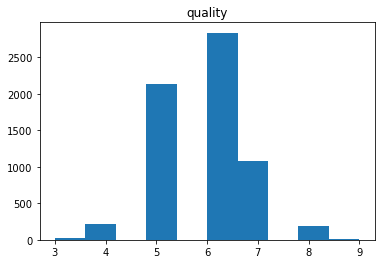

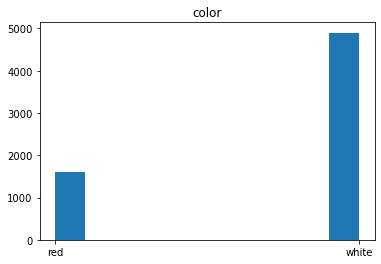

In [14]:
ww.plot_uni_var(wine)

In [15]:
wine.sample(50)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
252,11.1,0.350,0.48,3.10,0.090,5.0,21.0,0.99860,3.17,0.53,10.5,5,red
876,7.1,0.470,0.00,2.20,0.067,7.0,14.0,0.99517,3.40,0.58,10.9,4,red
1307,6.8,0.680,0.09,3.90,0.068,15.0,29.0,0.99524,3.41,0.52,11.1,4,red
2806,7.5,0.170,0.71,11.80,0.038,52.0,148.0,0.99801,3.03,0.46,8.9,5,white
1328,6.5,0.520,0.11,1.80,0.073,13.0,38.0,0.99550,3.34,0.52,9.3,5,red
3828,6.3,0.400,0.24,5.10,0.036,43.0,131.0,0.99186,3.24,0.44,11.3,6,white
1729,7.5,0.220,0.33,6.70,0.036,45.0,138.0,0.99390,3.20,0.68,11.4,6,white
1006,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7,red
4689,6.7,0.160,0.32,12.50,0.035,18.0,156.0,0.99666,2.88,0.36,9.0,6,white
3331,6.8,0.230,0.32,8.60,0.046,47.0,159.0,0.99452,3.08,0.52,10.5,6,white


In [16]:
wine.shape

(6497, 13)

In [17]:
#baseline
#Perecent of wines with a quality rating of 6
wine[wine.quality == 6].shape[0]/wine.shape[0]


0.43650915807295676

In [18]:
#renaime columns to remove spaces
wine.rename(columns={'fixed acidity': 'fixed_acidity', 'volatile acidity': 'volatile_acidity', 'citric acid': 'citric_acid', 'residual sugar': 'residual_sugar', 'free sulfur dioxide': 'free_sulfur_dioxide', 'total sulfur dioxide': 'total_sulfur_dioxide'}, inplace=True)

In [19]:
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [20]:
train_wine, validate_wine, test_wine= ww.split_function_cat_target(wine, 'quality')

In [21]:
train_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
871,7.7,0.34,0.58,11.1,0.039,41.0,151.0,0.99780,3.06,0.49,8.6,5,white
2965,5.5,0.34,0.26,2.2,0.021,31.0,119.0,0.98919,3.55,0.49,13.0,8,white
2477,6.1,0.27,0.31,1.5,0.035,17.0,83.0,0.99076,3.32,0.44,11.1,7,white
673,8.2,0.73,0.21,1.7,0.074,5.0,13.0,0.99680,3.20,0.52,9.5,5,red
3115,6.3,0.17,0.32,4.2,0.040,37.0,117.0,0.99182,3.24,0.43,11.3,6,white


The categorical variables are: 
 ['quality', 'color'] 

The continuous variables are: 
 ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol'] 



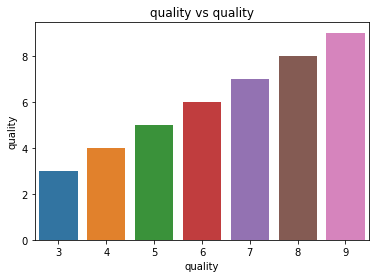

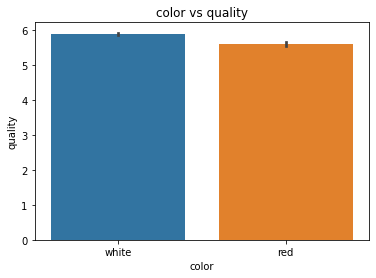

In [22]:
ww.plot_categorical_and_target_var(train_wine, "quality")

In [23]:
#color does not effect quality

The categorical variables are: 
 ['color'] 

The continuous variables are: 
 ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'] 

FIXED_ACIDITY and quality


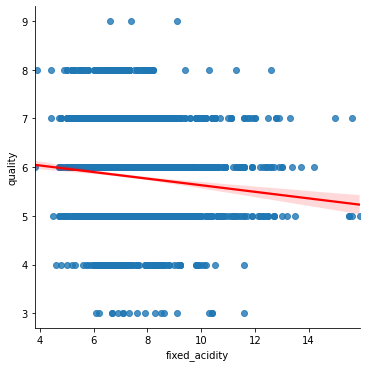

VOLATILE_ACIDITY and quality


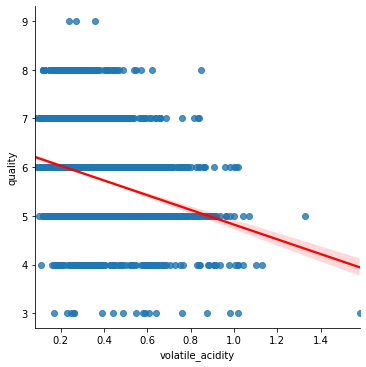

CITRIC_ACID and quality


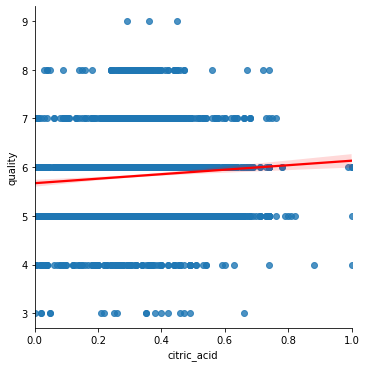

RESIDUAL_SUGAR and quality


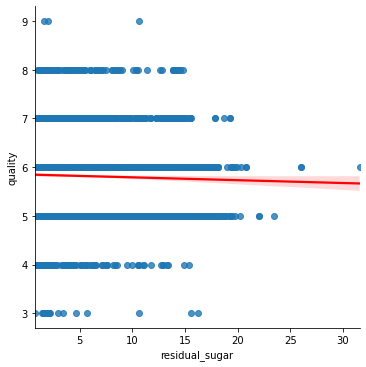

CHLORIDES and quality


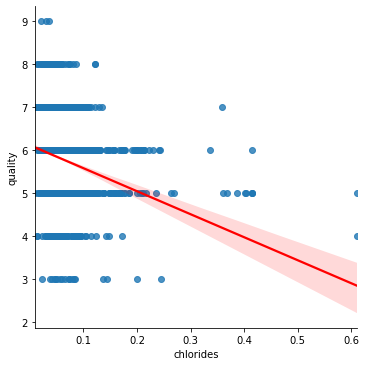

FREE_SULFUR_DIOXIDE and quality


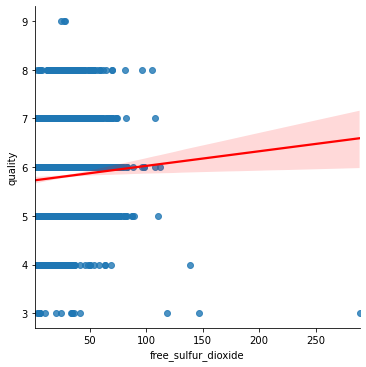

TOTAL_SULFUR_DIOXIDE and quality


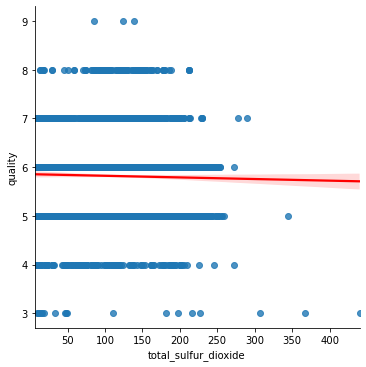

DENSITY and quality


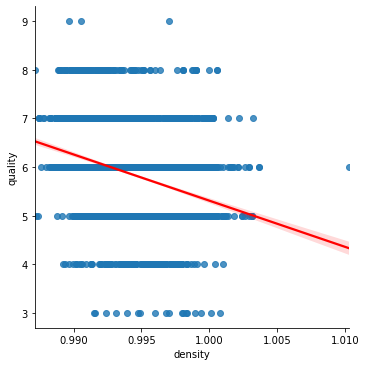

PH and quality


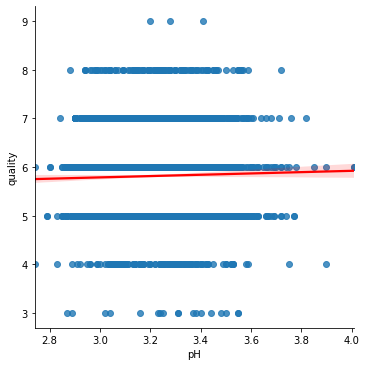

SULPHATES and quality


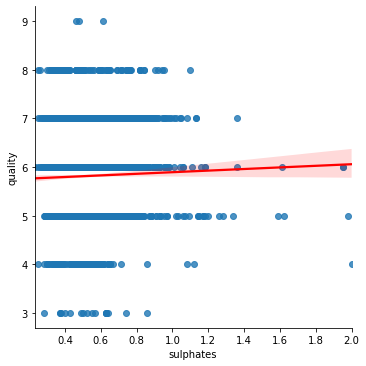

ALCOHOL and quality


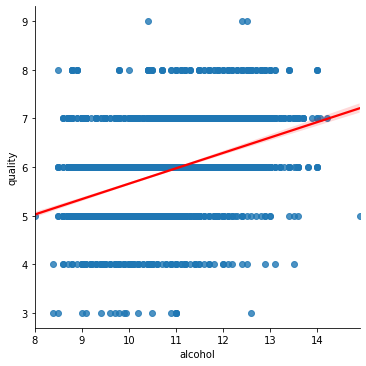

QUALITY and quality


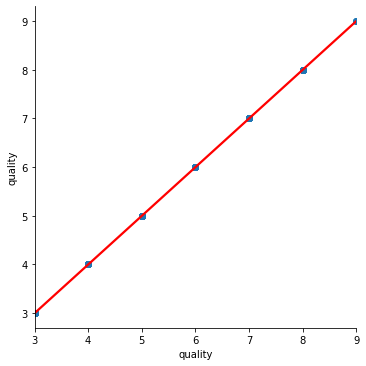

In [53]:
ww.plot_variable_target_pairs(train_wine,"quality")

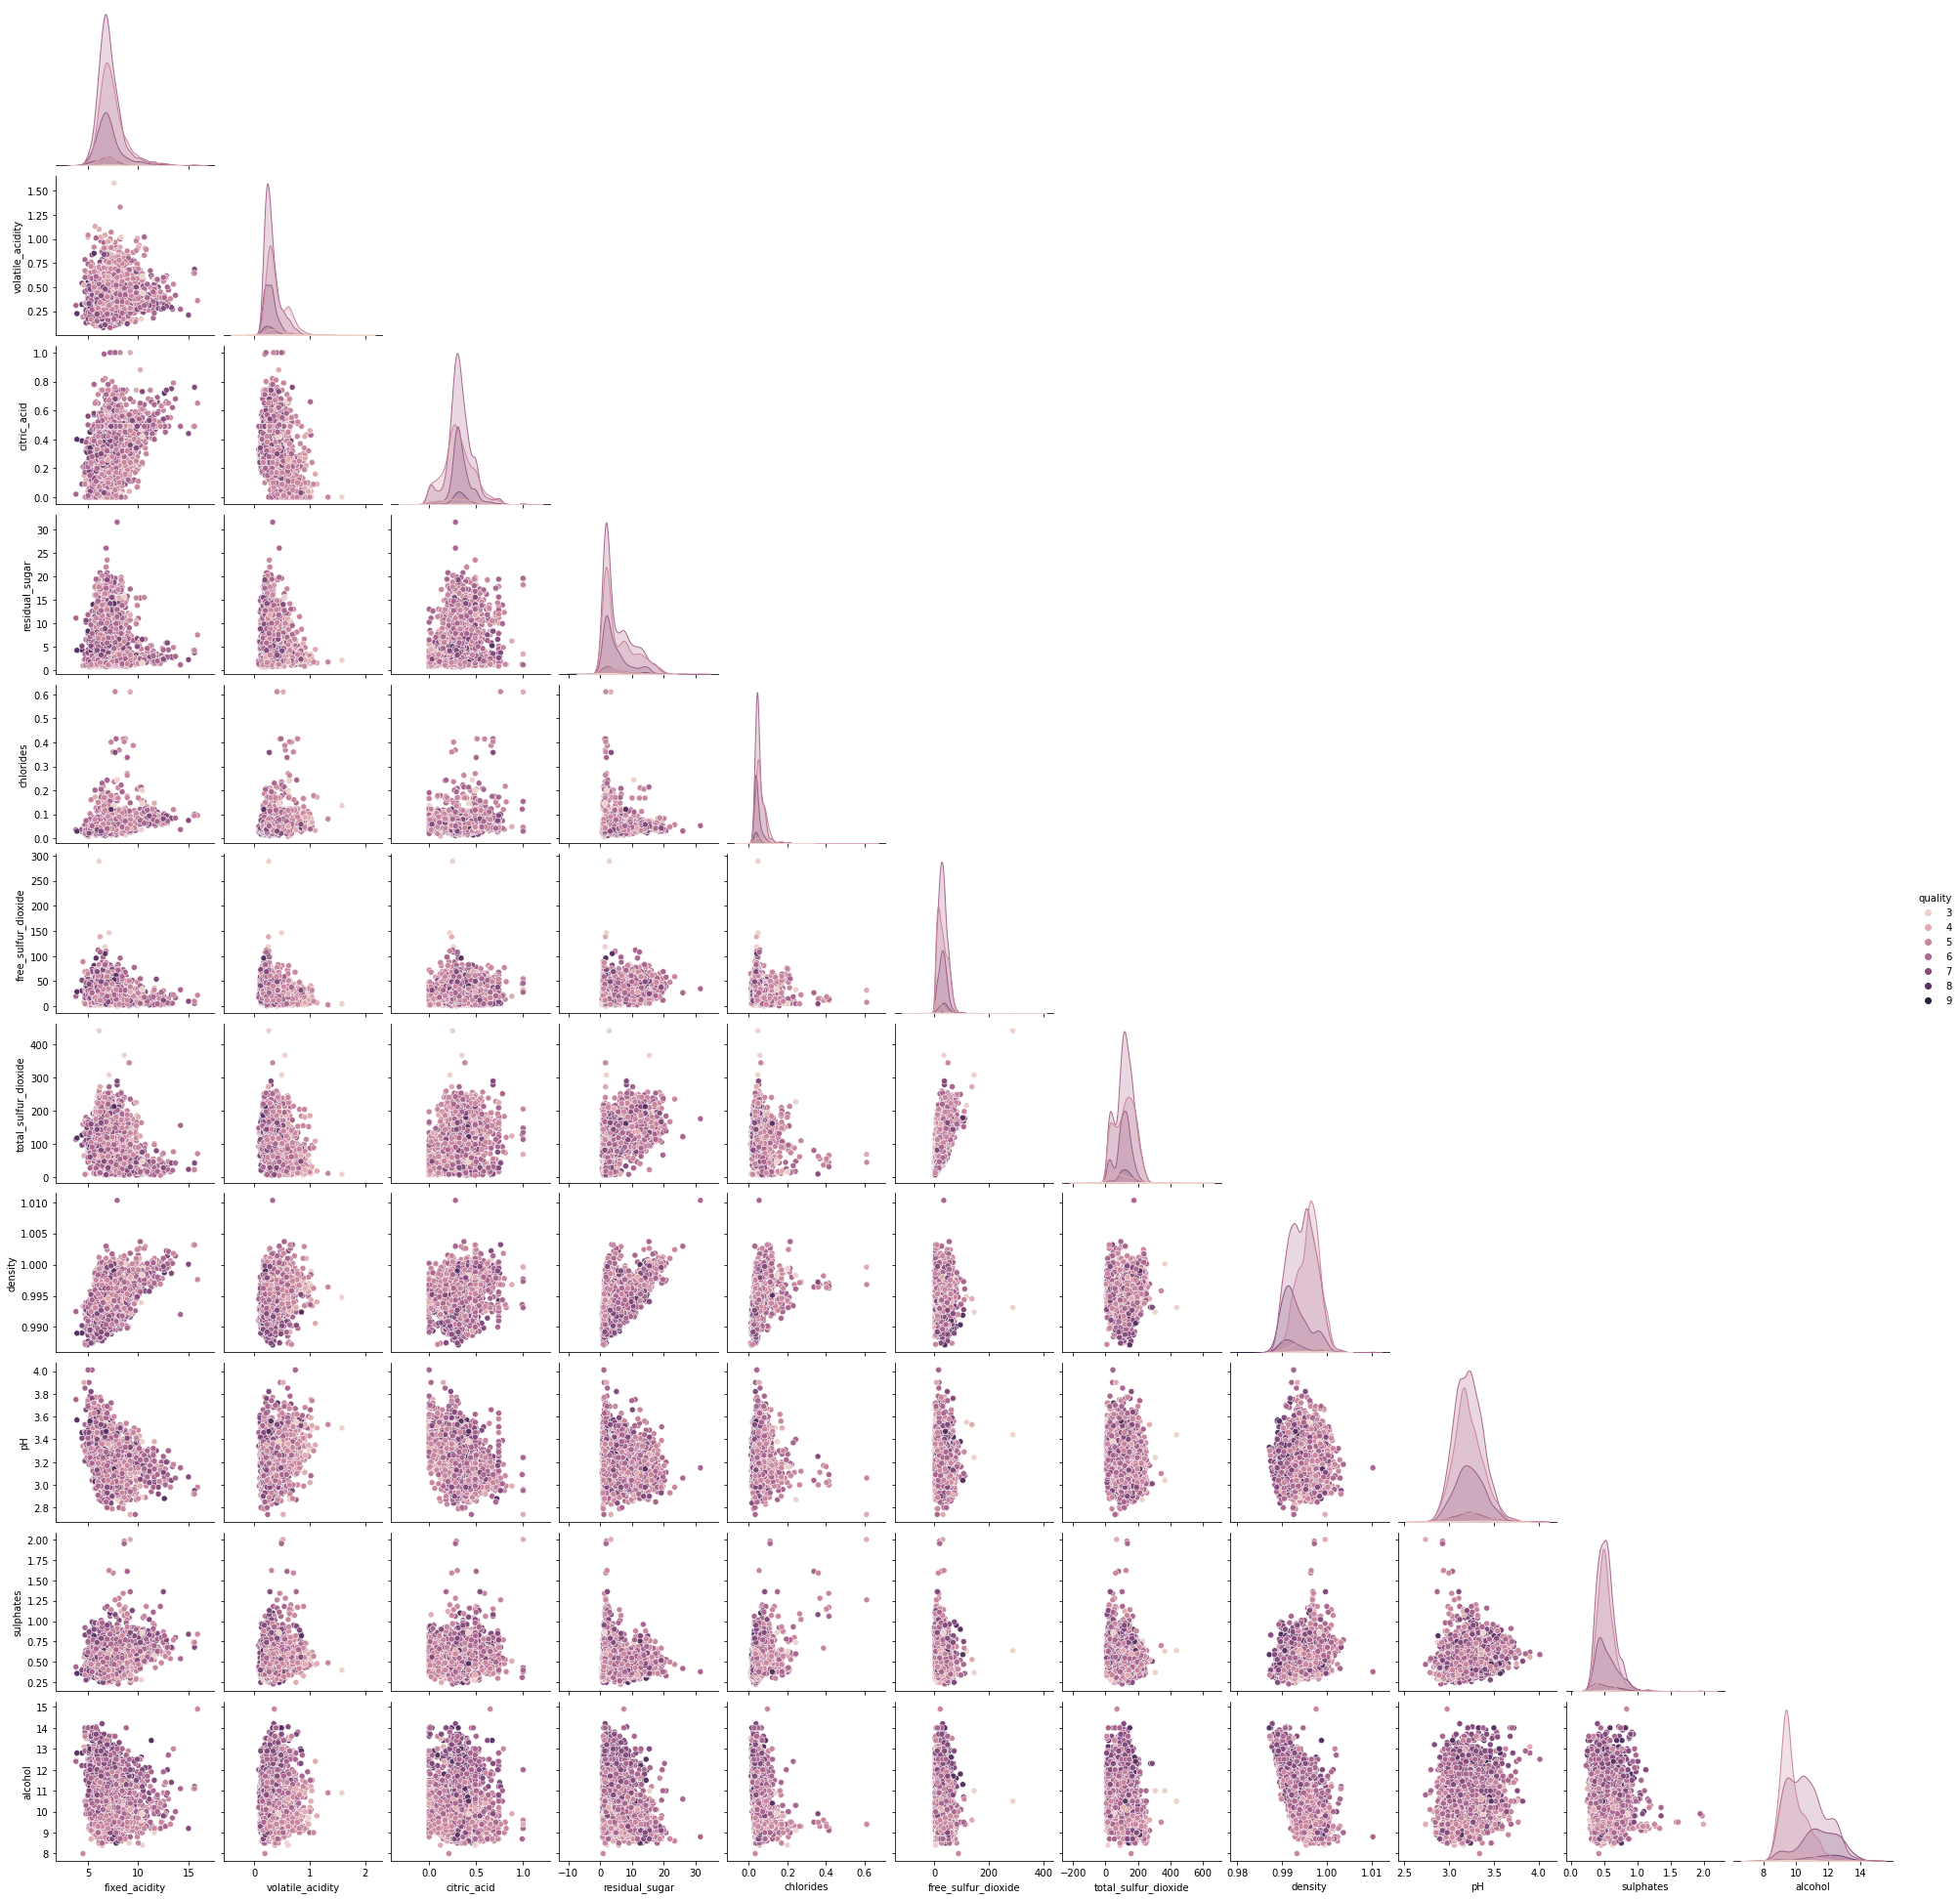

In [25]:
ww.pairplot_everything(train_wine, "quality")

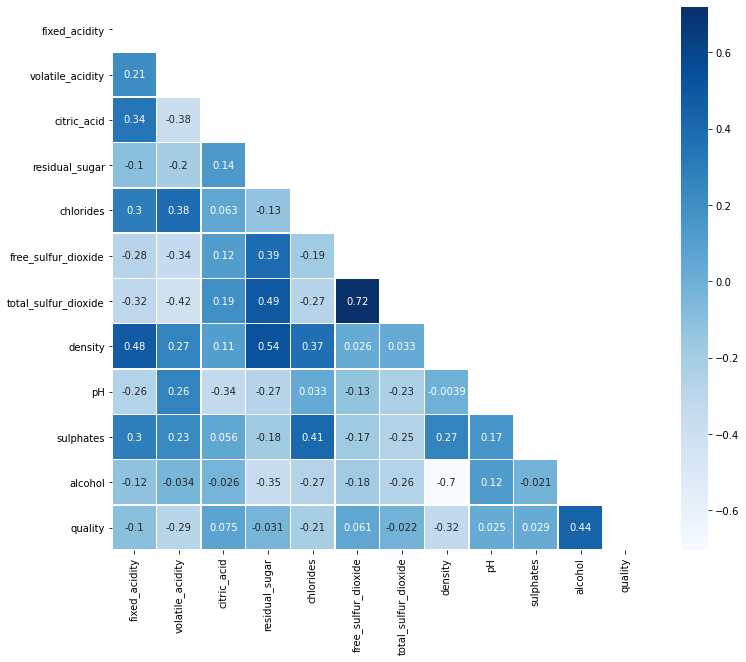

In [26]:
ww.corr_heatmap(train_wine)

In [27]:
#function to scater plot all the numeric variables against the target variable
def plot_variable_target_pairs(df, target_var):
    '''
    This function takes in a dataframe and a target variable and returns a scatter plot of all the numeric variables against the target variable
    '''
    num_cols = df.select_dtypes(exclude='O').columns.to_list()
    for col in num_cols:
        sns.relplot(x=col, y=target_var, data=df)
        plt.show()

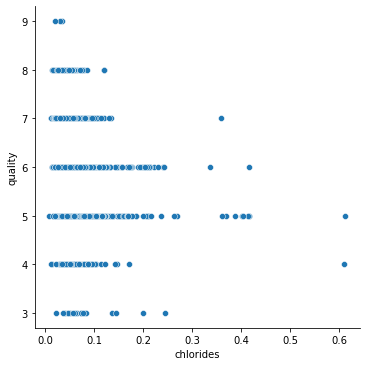

In [28]:
#scater plot for chlorides and quality
sns.relplot(x='chlorides', y='quality', data=train_wine)
plt.show()

In [29]:
X_train, X_validate, X_test =train_wine[["alcohol","density","chlorides","volatile_acidity"]], validate_wine[["alcohol","density","chlorides","volatile_acidity"]], test_wine[["alcohol","density","chlorides","volatile_acidity"]]
y_train, y_validate, y_test = train_wine[["quality"]], validate_wine[["quality"]], test_wine[["quality"]]

In [30]:
atm.auto_knn_graph(X_train, y_train, X_validate, y_validate)


------------------------ Train Model with K range of 3 ------------------------------
                   3           4            5            6           7  \
precision   0.454545    0.446328     0.737892     0.772648    0.751894   
recall      0.555556    0.607692     0.808112     0.777190    0.613601   
f1-score    0.500000    0.514658     0.771407     0.774912    0.675745   
support    18.000000  130.000000  1282.000000  1701.000000  647.000000   

                    8    9  accuracy    macro avg  weighted avg  
precision    0.727273  0.0  0.740056     0.555797      0.743468  
recall       0.344828  0.0  0.740056     0.529568      0.740056  
f1-score     0.467836  0.0  0.740056     0.529223      0.737606  
support    116.000000  3.0  0.740056  3897.000000   3897.000000  
------------ Metrics ----------

---------------------Validate Model with K range of 3---------------------------------
                   3           4            5            6           7  \
precision   0.4545

In [31]:
atm.auto_random_trees(X_train, y_train, X_validate, y_validate)


------------------------ Train Model with depth of 5 ------------------------------
              3      4            5            6           7      8    9  \
precision   0.0    0.0     0.631950     0.529890    0.701863    0.0  0.0   
recall      0.0    0.0     0.629485     0.766020    0.174652    0.0  0.0   
f1-score    0.0    0.0     0.630715     0.626442    0.279703    0.0  0.0   
support    18.0  130.0  1282.000000  1701.000000  647.000000  116.0  3.0   

           accuracy    macro avg  weighted avg  
precision  0.570439     0.266243      0.555712  
recall     0.570439     0.224308      0.570439  
f1-score   0.570439     0.219551      0.527360  
support    0.570439  3897.000000   3897.000000  
------------ Metrics ----------

---------------------Validate Model with depth of 5---------------------------------
             3     4           5           6           7     8    9  accuracy  \
precision  0.0   0.0    0.612591    0.503529    0.540541   0.0  0.0  0.539231   
recall   


------------------------ Test Model with depth of 20 ------------------------------


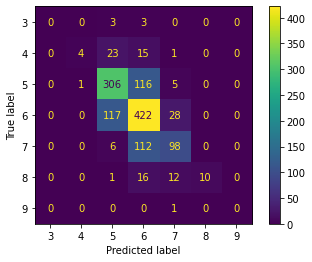

             3          4           5           6           7          8    9  \
precision  0.0   0.800000    0.671053    0.616959    0.675862   1.000000  0.0   
recall     0.0   0.093023    0.714953    0.744268    0.453704   0.256410  0.0   
f1-score   0.0   0.166667    0.692308    0.674660    0.542936   0.408163  0.0   
support    6.0  43.000000  428.000000  567.000000  216.000000  39.000000  1.0   

           accuracy    macro avg  weighted avg  
precision  0.646154     0.537696      0.658779  
recall     0.646154     0.323194      0.646154  
f1-score   0.646154     0.354962      0.630153  
support    0.646154  1300.000000   1300.000000  
------------ Metrics ----------
Accuracy is 0.6461538461538462


In [47]:
atm.auto_random_trees_test(X_test, y_test, X_train, y_train)

# Best Models

## The best classification model for predicting wine quality was the random forest model with a depth of 20
- The overal accuracy of the model was 64% beating the baseline of 44%
- Precision scores of:
    - Quality 3 : 0%
    - Quality 4 : 80%
    - Quality 5 : 67%
    - Quality 6 : 62%
    - Quality 7 : 68%
    - Quality 8 : 100%
    - Quality 9 : 0%
- Precision was choosen to rate the model based on how well it avoids false positives.     

In [33]:
atm.auto_lo_regress(X_train, y_train, X_validate, y_validate)


------------------------ Train Model with C of 5 ------------------------------
              3           4            5            6           7      8    9  \
precision   0.0    0.500000     0.571429     0.511160    0.460317    0.0  0.0   
recall      0.0    0.007692     0.605304     0.686655    0.179289    0.0  0.0   
f1-score    0.0    0.015152     0.587879     0.586051    0.258065    0.0  0.0   
support    18.0  130.000000  1282.000000  1701.000000  647.000000  116.0  3.0   

           accuracy    macro avg  weighted avg  
precision  0.528868     0.291844      0.504203  
recall     0.528868     0.211277      0.528868  
f1-score   0.528868     0.206735      0.492551  
support    0.528868  3897.000000   3897.000000  
------------ Metrics ----------

---------------------Validate Model with C of 5---------------------------------
             3     4           5           6           7     8    9  accuracy  \
precision  0.0   0.0    0.578495    0.514993    0.397059   0.0  0.0  0.53

In [48]:
X_train, X_validate, X_test =train_wine[["alcohol","density","chlorides","volatile_acidity","fixed_acidity", "citric_acid","residual_sugar","free_sulfur_dioxide","total_sulfur_dioxide" ,"pH","sulphates"]], validate_wine[["alcohol","density","chlorides","volatile_acidity","fixed_acidity", "citric_acid","residual_sugar","free_sulfur_dioxide","total_sulfur_dioxide" ,"pH","sulphates"]], test_wine[["alcohol","density","chlorides","volatile_acidity","fixed_acidity", "citric_acid","residual_sugar","free_sulfur_dioxide","total_sulfur_dioxide" ,"pH","sulphates"]]
y_train, y_validate, y_test = train_wine[["quality"]], validate_wine[["quality"]], test_wine[["quality"]]

In [41]:
X_train, X_validate, X_test =train_wine[["alcohol","density","chlorides","volatile_acidity"]], validate_wine[["alcohol","density","chlorides","volatile_acidity"]], test_wine[["alcohol","density","chlorides","volatile_acidity"]]
y_train, y_validate, y_test = train_wine[["quality"]], validate_wine[["quality"]], test_wine[["quality"]]

In [49]:
X_train_scaled, X_validate_scaled, X_test_scaled = ww.scale_data(X_train, X_validate, X_test)





In [37]:
X_train_scaled.head()

,alcohol,density,chlorides,volatile_acidity
871,0.086957,0.460509,0.049834,0.173333
2965,0.724638,0.088908,0.019934,0.173333
2477,0.449275,0.156668,0.043189,0.126667
673,0.217391,0.417350,0.107973,0.433333
3115,0.478261,0.202417,0.051495,0.060000


In [50]:
atm3.auto_regress( y_train, train_wine, X_train_scaled, X_validate_scaled, y_validate, X_test_scaled)

           model      RMSE           r^2
0  mean_baseline  0.873493  0.000000e+00
1          ols_1  0.848281  5.298483e-02
2          ols_2  0.739816  2.796814e-01
3           lars  0.871689 -5.214815e-07
4           poly  4.625402 -2.715635e+01
5            glm  0.739496  2.803045e-01


The best model is the glm model



## Best Regression Model is the GLM (Tweedie Test) 
- RMSE was .74 with an r^2 of .28


['Tweedie Test', 0.7421852360313733, 0.2785121136616786]


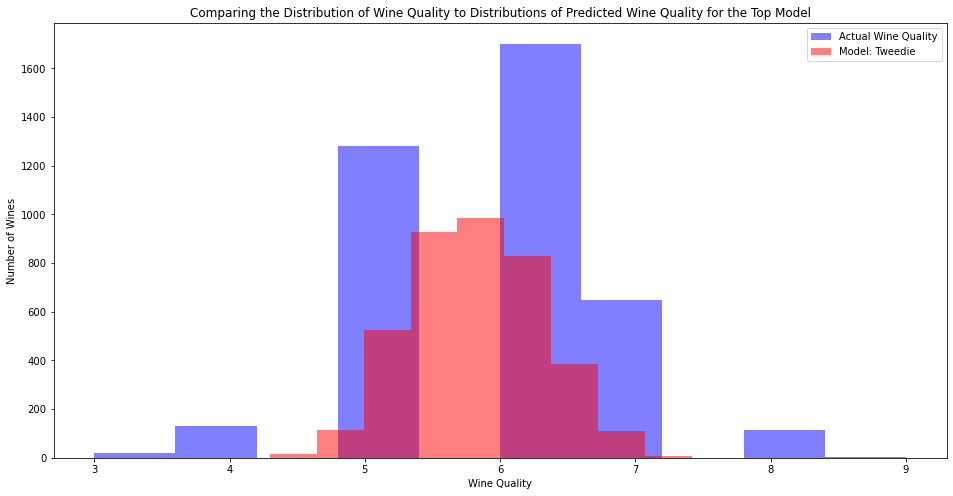

In [51]:
tm.test_tweedie_model(y_train, y_test, X_train_scaled,X_test_scaled)

# Model conclusions

### The random forest performed well at predicting wines in the quality ranges of 4-7 even hitting over 80% true positive rates at 4 and 7. The model preformed worse at the end ranges mostly due to the fact that in those ranges there are limited number of wines. 

### While the tweedie model beat baseline at % a .74 RMSE means that predictions will still be off nearly an entire quality level. This is refelcted in the graph by showing how that most of the predictions are clumped in the middle. 

### Classification modeling (random forest) is comparativly better than any regression model for predicting specific catagories sprend across a greater range of predicte and actual datapoints.